In [117]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [118]:
df=pd.read_csv('housing.csv')
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


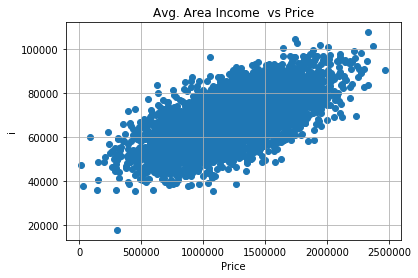

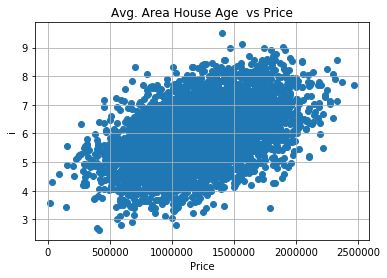

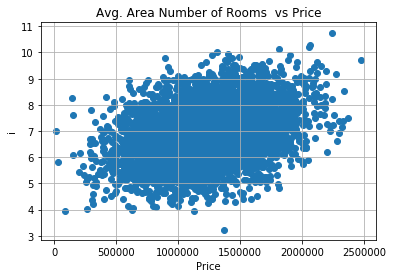

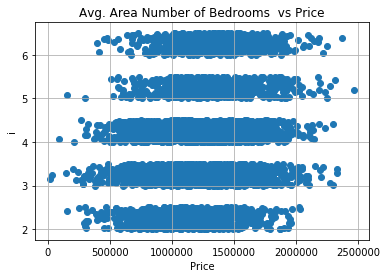

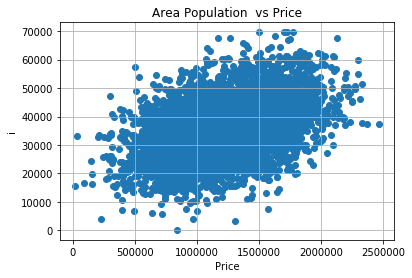

In [119]:
for i in df.columns[:-2]:
    plt.scatter(df['Price'],df[i])
    plt.xlabel('Price')
    plt.ylabel('i')
    plt.grid()
    plt.title(i+'  vs Price')
    plt.show()

In [120]:
import seaborn as sns

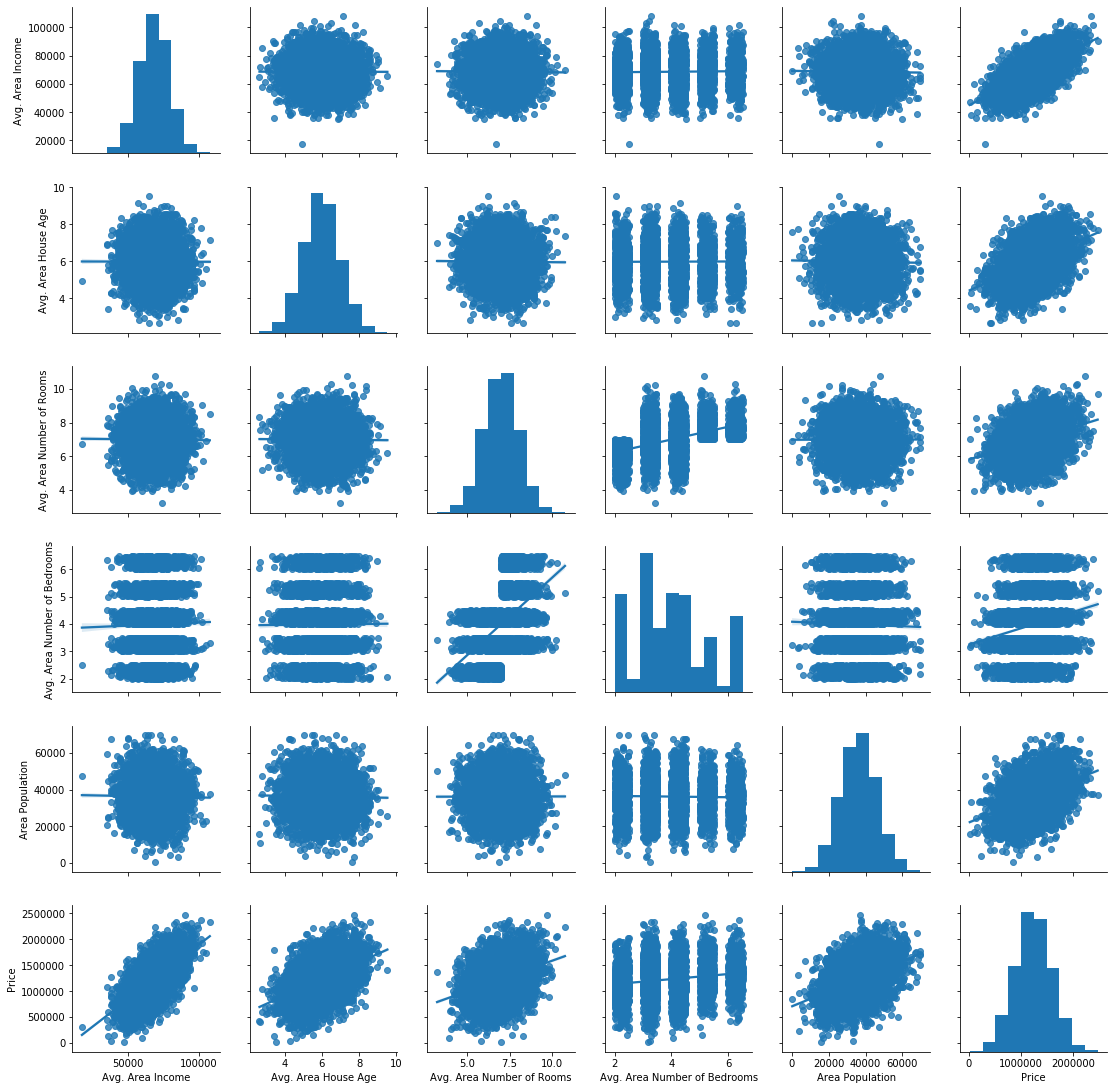

In [121]:
sns.pairplot(df,kind='reg')

In [122]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [123]:
x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Area Population']]
y=df['Price']

# 1. Splitting the Data

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=10)

In [126]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 4875 to 1289
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           3750 non-null   float64
 1   Avg. Area House Age        3750 non-null   float64
 2   Avg. Area Number of Rooms  3750 non-null   float64
 3   Area Population            3750 non-null   float64
dtypes: float64(4)
memory usage: 146.5 KB


In [127]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 245 to 1234
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           1250 non-null   float64
 1   Avg. Area House Age        1250 non-null   float64
 2   Avg. Area Number of Rooms  1250 non-null   float64
 3   Area Population            1250 non-null   float64
dtypes: float64(4)
memory usage: 48.8 KB


In [128]:
ytrain.shape

(3750,)

In [129]:
xtrain.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
4875,58676.411529,5.978277,5.666757,56269.462943
2773,59046.444231,6.670060,7.335985,37813.714630
4391,50703.152916,6.096813,7.784818,26324.207865
3433,79263.554759,5.185727,6.066881,36164.655454
3764,55593.079806,7.920282,7.976184,42067.693935


# 2. Creating the Machine Learning Model

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
model=LinearRegression()

# 3. Training the model with Training Data

In [132]:
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
model.coef_

array([2.15919468e+01, 1.65128318e+05, 1.20463708e+05, 1.53368278e+01])

In [134]:
pd.DataFrame(model.coef_, columns=['Coef.'],index=x.columns)

,Coef.
Avg. Area Income,21.591947
Avg. Area House Age,165128.317665
Avg. Area Number of Rooms,120463.708087
Area Population,15.336828


# 4. Evaluation

In [135]:
print('%.1f%%'%(model.score(xtest,ytest)*100))

91.8%


In [136]:
import pickle

In [137]:
ypred=model.predict(xtest)

In [138]:
ypred

array([1193899.36335096, 1187262.43784591, 1046347.43872966, ...,
        769979.21424061, 1588323.12890354, 1732539.85447395])

In [139]:
ytest

245     1.118048e+06
4493    1.326947e+06
4583    1.053485e+06
2242    7.590447e+05
3407    1.381118e+06
            ...     
4274    1.779858e+06
2551    1.404541e+06
2476    9.143783e+05
3711    1.479296e+06
1234    1.747245e+06
Name: Price, Length: 1250, dtype: float64

In [140]:
from sklearn.metrics import mean_absolute_error

In [141]:
print(mean_absolute_error(ytest,ypred))

80728.01465732267


In [142]:
ypred[0]

1193899.3633509637

In [143]:
100*mean_absolute_error(ytest,ypred)/ypred[0]

6.761710168832004

# 5. Deployment

In [144]:
final_model = model

In [145]:
pd.to_pickle(final_model,'HousePricePredictor')

In [146]:
model = pd.read_pickle('HousePricePredictor')

In [147]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
cols=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population']

# GUI

In [156]:
app = tk.Tk()
app.title('Price predictor form')
app.geometry('400x280')
app.configure(bg='light blue')

income = tk.Variable(app)
house_age = tk.Variable(app)
rooms = tk.Variable(app)
population= tk.Variable(app)

tk.Label(app, text='Income',font=('Roboto Slab', 10, 'bold')).place(x=20,y=30)
tk.Label(app, text='House Age',font=('Roboto Slab', 10, 'bold')).place(x=20,y=60)
tk.Label(app, text='Number of rooms',font=('Roboto Slab', 10, 'bold')).place(x=20,y=90)
tk.Label(app, text='Population',font=('Roboto Slab', 10, 'bold')).place(x=20,y=120)

tk.Entry(app,width=30,bg='#f5ffff',font=('Roboto Slab', 10),textvariable=income).place(x=150,y=30)
tk.Entry(app,width=30,bg='#f5ffff',font=('Roboto Slab', 10),textvariable=house_age).place(x=150,y=60)
tk.Entry(app,width=30,bg='#f5ffff',font=('Roboto Slab', 10),textvariable=rooms).place(x=150,y=90)
tk.Entry(app,width=30,bg='#f5ffff',font=('Roboto Slab', 10),textvariable=population).place(x=150,y=120)

def values():
    
    i=income.get()
    h=house_age.get()
    r=rooms.get()
    p=population.get()
    
    income.set('')
    house_age.set('')
    rooms.set('')
    population.set('')

    query=pd.DataFrame({'Avg. Area Income':[i],'Avg. Area House Age':[h],'Avg. Area Number of Rooms':[r],'Area Population':[p]})

    values_var=tk.Variable(app)

    values_var.set('%.1f$'%(model.predict(query)[0]))

    values=tk.Label(app, text='Price can be :',bg='yellow',font=('Roboto Slab', 10, 'bold')).place(x=40,y=230)
    
    values=tk.Label(app, text='Price can be :',textvariable=values_var,bg='yellow',font=('Roboto Slab', 10, 'bold')).place(x=130,y=230)

    
tk.Button(app, text='  Predict  ',bg='red',foreground='white',font=('Roboto Slab', 12, 'bold'),command=values).place(x=150,y=170)


app.mainloop()